# Case study on Supervised learning


Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [1]:
## Load necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Read the dataset to the python environment.

In [2]:

data=pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

There are 150 observations with 4 features

# 2. Do necessary pre-processing steps.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Classification, dtype: int64

In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are null values in columns SL,SW,PL

In [9]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

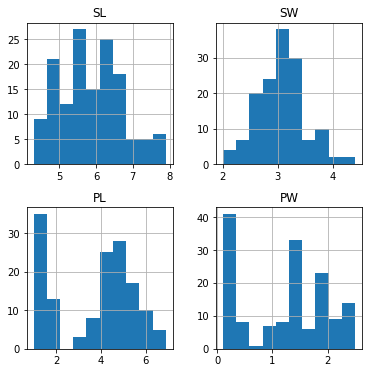

In [10]:
fraqgraph=data.select_dtypes(include=['float'])
fraqgraph.hist(figsize=(6,6))
plt.show()

In [11]:
for i in ['SL', 'SW','PL']:
      data[i]=data[i].fillna(data[i].mean())

The missing values are filled with mean

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Dataset is clean with no missing values.

In [13]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'Box plot of Sepal Length')

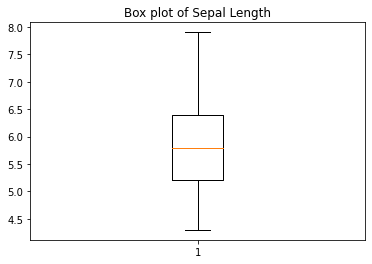

In [14]:
plt.boxplot(data['SL'])
plt.title('Box plot of Sepal Length')


No outliers are present

Text(0.5, 1.0, 'Box plot of Sepal Width')

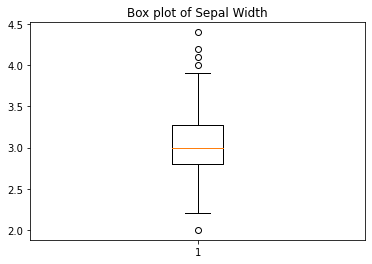

In [15]:
plt.boxplot(data['SW'])
plt.title('Box plot of Sepal Width')

Few outliers are present

In [16]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

print(Q1)
print(Q2)
print(Q3)


2.8
3.0
3.25


In [17]:
IQR=Q3-Q1

In [18]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

2.1249999999999996
3.9250000000000003


In [19]:
outlier=[]
for x in data['SW']:
    if((x>up_limit)or (x<low_limit)):
         outlier.append(x)

In [20]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [21]:
ind1=data['SW']>up_limit 
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [22]:
ind2=data['SW']<low_limit
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [23]:
data.drop([14, 15, 32, 33,60],inplace=True)

Text(0.5, 1.0, 'Sepal Width')

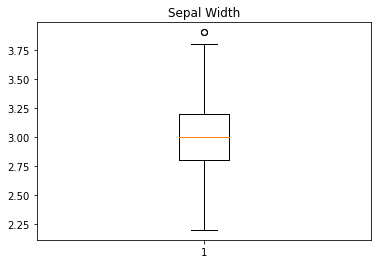

In [24]:
##Box plot after removing outliers
plt.boxplot(data['SW'])
plt.title('Sepal Width')

Text(0.5, 1.0, 'Box plot of petal length')

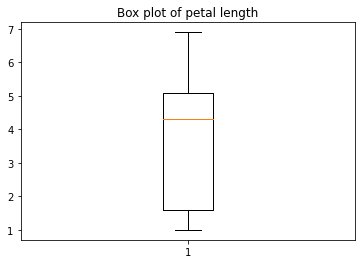

In [25]:
plt.boxplot(data['PL'])
plt.title('Box plot of petal length')

Text(0.5, 1.0, 'Box plot of Petal Width')

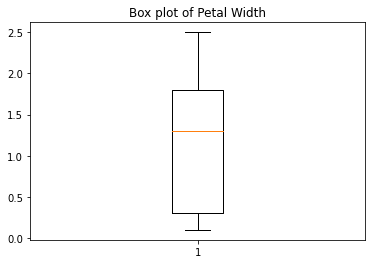

In [26]:
plt.boxplot(data['PW'])
plt.title('Box plot of Petal Width')

<AxesSubplot:>

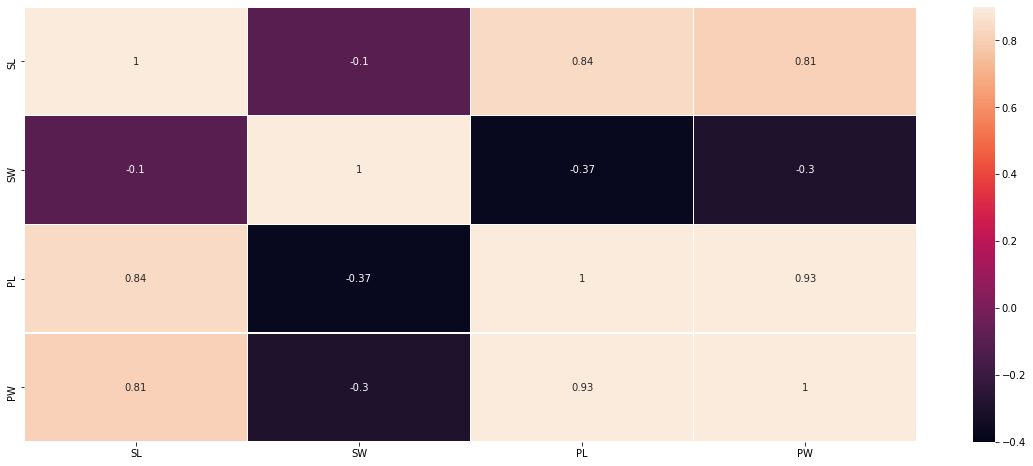

In [27]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.4,vmax=0.9,annot=True,linewidths=0.2)

# Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
data['Classification']=label_en.fit_transform(data['Classification'])
data.head()


,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


The target column is converted to integer value

In [31]:
data.shape

(145, 5)

 Model Building

In [32]:
X=data.drop(['Classification'],axis=1)
y=data['Classification']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [34]:
X_train.shape

(101, 4)

In [35]:
X_test.shape

(44, 4)

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [37]:
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
print('Accuracy is  :',accuracy_score(y_test,y_pred))


Accuracy is  : 0.8863636363636364


In [39]:
confusion_matrix(y_test,y_pred)

array([[14,  1,  0],
       [ 0, 10,  1],
       [ 0,  3, 15]], dtype=int64)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)



In [41]:
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

In [42]:
print('Accuracy is  :',accuracy_score(y_test,y_pred))

Accuracy is  : 0.9318181818181818


Accuracy improved after scaling using logistic Regression

# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
acc_values=[]
neighbors=np.arange(3,20)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [45]:
acc_values

[0.9318181818181818,
 0.8863636363636364,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.8863636363636364,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.8863636363636364,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.8863636363636364,
 0.8863636363636364,
 0.8863636363636364,
 0.9090909090909091]

Text(0, 0.5, 'accuracy')

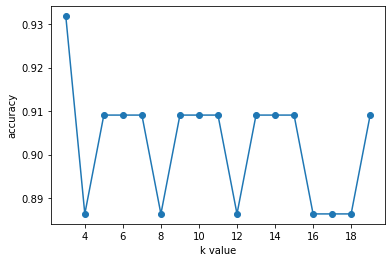

In [46]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [47]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [48]:
print('Accuracy is  :',accuracy_score(y_test,y_pred))


Accuracy is  : 0.9318181818181818


In [49]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  2, 16]], dtype=int64)

# SVM

In [52]:
from sklearn.svm import SVC

Linear

In [53]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [54]:
y_pred=svm_linear.predict(X_test)

In [55]:
print('Accuracy is  :',accuracy_score(y_test,y_pred))

Accuracy is  : 0.9318181818181818


Polynomial

In [56]:
svm_poly=SVC(kernel='poly',degree=3)

In [57]:
svm_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [58]:
y_pred=svm_poly.predict(X_test)

In [59]:
print('Accuracy is  :',accuracy_score(y_test,y_pred))

Accuracy is  : 0.7954545454545454


rbf

In [60]:
svm_rad=SVC(kernel='rbf')

In [61]:
svm_rad.fit(X_train,y_train)

SVC()

In [62]:
y_pred=svm_rad.predict(X_test)

In [63]:
print('Accuracy is  :',accuracy_score(y_test,y_pred))

Accuracy is  : 0.9090909090909091


# Random forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [65]:
print('Accuracy is  :',accuracy_score(y_test,y_pred))

Accuracy is  : 0.9090909090909091
